In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!nvidia-smi

Thu Jan 11 10:12:41 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [4]:
!pip install tensorflow==2.13.0
import tensorflow as tf

# Explicitly set GPU device
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
print(tf.__version__)
print(tf.test.gpu_device_name())
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Found GPU at: /device:GPU:0


In [6]:
import os
import pathlib

# Clone the tensorflow models repository if it doesn't already exist
if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 4065, done.
remote: Counting objects: 100% (4065/4065), done.
remote: Compressing objects: 100% (3105/3105), done.
remote: Total 4065 (delta 1184), reused 1938 (delta 900), pack-reused 0
Receiving objects: 100% (4065/4065), 56.43 MiB | 30.59 MiB/s, done.
Resolving deltas: 100% (1184/1184), done.


In [7]:
# Install the Object Detection API
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Processing /content/models/research
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 85.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 86.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 35.4 MB/s eta 0:00:00
     ━━━━━━

In [8]:
#run model builder test
!python /content/models/research/object_detection/builders/model_builder_tf2_test.py

2024-01-11 10:13:49.300812: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-11 10:13:49.300856: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-11 10:13:49.302516: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-11 10:13:51.296950: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Running tests under Python 3.10.12: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2024-01-11 10:13:57.983808: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting beca

In [ ]:
'''#Install required packages
!pip install tensorflow-addons
!pip install tf-models-official
# Upgrade tf_slim to avoid conflicts with other dependencies
!pip install -U tf_slim
!pip install pycocotools lvis numba'''

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 4.2 MB/s eta 0:00:00
/bin/bash: -c: line 1: unexpected EOF while looking for matching `''
/bin/bash: -c: line 2: syntax error: unexpected end of file


In [10]:
# Update your pipeline configuration file with these paths
pipeline_file = "/content/drive/MyDrive/dissertation_project/efficient_det_pipeline.config"
model_dir = "/content/drive/MyDrive/dissertation_project/model_training/efficient_det_d1"

# Start the training script
!python /content/models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={pipeline_file} \
    --model_dir={model_dir} \
    --alsologtostderr

2024-01-11 10:16:12.620253: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-01-11 10:16:18.950204: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
I0111 10:16:18.952390 139038133097088 mirrored_strategy.py:419] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: None
I0111 10:16:18.976309 139038133097088 config_util.py:552] Maybe overwriting train_steps: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0111 10:16:18.976451 13903813

In [ ]:
# Set the paths
pipeline_file = "/content/drive/MyDrive/dissertation_project/models/efficientdet_pipeline.config"
model_dir = "/content/drive/MyDrive/dissertation_project/model_training/efficient_det_d1"
chk_pnt = "/content/drive/MyDrive/dissertation_project/model_training/efficient_det_d1"
# Run evaluation script
!python /content/models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={pipeline_file} \
    --model_dir={model_dir} \
    --checkpoint_dir={chk_pnt} \
    --eval_timeout=3600 \ # Optional: Set a timeout for evaluation in seconds (adjust as needed)
    --alsologtostderr

IndentationError: ignored

In [ ]:
#Export the trained model
!python /content/models/research/object_detection/exporter_main_v2.py \
    --input_type image_tensor \
    --pipeline_config_path /content/drive/MyDrive/dissertation_project/models/efficientdet_pipeline.config \
    --trained_checkpoint_dir /content/drive/MyDrive/dissertation_project/model_training/efficient_det_d1 \
    --output_directory /content/drive/MyDrive/dissertation_project/exported_model/efficient_det_d1

2023-11-20 18:36:17.289090: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-11-20 18:36:21.968415: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
W1120 18:36:22.011539 133368370561024 batch_normalization.py:1531] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W1120 18:36:23.370422 133368370561024 deprecation.py:641] From /usr/local/lib/python3.10/dist-packages/tensorflow/python/autograph/impl/api.py:459: 

In [ ]:
%tensorboard --logdir=/content/drive/MyDrive/dissertation_project/model_training/center_hog_512

2023-11-18 07:12:29.804197: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.13.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C


# **Requirements**

In [ ]:
'''import matplotlib
import matplotlib.pyplot as plt

import os
import random
import io
import imageio
import glob
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display, Javascript
from IPython.display import Image as IPyImage

import tensorflow as tf

from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import colab_utils
from object_detection.builders import model_builder

%matplotlib inline

from google.protobuf import text_format
from numba import cuda

In [ ]:
'''#Define the image size you want for your model
target_size = (640, 640)

# Define the batch size for training
batch_size = 4

# Define the path to the main dataset directory
dataset_dir = '/content/drive/MyDrive/dissertation_project/wheat_dataset'

# Define the exact paths to your dataset directories
train_image_dir = '/content/drive/MyDrive/dissertation_project/wheat_dataset/wheat_dataset_640x640/images/train'
train_annotation_dir = '/content/drive/MyDrive/dissertation_project/wheat_dataset/wheat_dataset_640x640/annotations/train'
test_image_dir = '/content/drive/MyDrive/dissertation_project/wheat_dataset/wheat_dataset_640x640/images/test'
test_annotation_dir = '/content/drive/MyDrive/dissertation_project/wheat_dataset/wheat_dataset_640x640/annotations/test'
validation_image_dir = '/content/drive/MyDrive/dissertation_project/wheat_dataset/wheat_dataset_640x640/images/validation'
validation_annotation_dir='/content/drive/MyDrive/dissertation_project/wheat_dataset/wheat_dataset_640x640/annotations/validation'

In [ ]:
'''import os
import io
import xml.etree.ElementTree as ET
import tensorflow as tf
from object_detection.utils import dataset_util

def class_text_to_int(class_text):
    class_mapping = {'wheat_septoria': 1, 'wheat_brown_rust': 2, 'wheat_mildew': 3}
    return class_mapping.get(class_text, None)

def create_tf_example(xml_path, image_dir):
    tree = ET.parse(xml_path)
    root = tree.getroot()

    # Use the absolute path for image files
    image_path = os.path.join(image_dir, root.find("filename").text)
    with tf.io.gfile.GFile(image_path, 'rb') as fid:
        encoded_png = fid.read()

    encoded_png_io = io.BytesIO(encoded_png)
    image = tf.image.decode_image(encoded_png, channels=3)
    width, height = image.shape[1], image.shape[0]

    filename = root.find("filename").text.encode('utf8')
    image_format = b'png'
    xmins, xmaxs, ymins, ymaxs = [], [], [], []
    classes_text, classes = [], []

    for obj in root.findall("object"):
        class_name = obj.find("name").text
        classes_text.append(class_name.encode('utf8'))
        classes.append(class_text_to_int(class_name))
        bbox = obj.find("bndbox")
        xmins.append(float(bbox.find("xmin").text))
        xmaxs.append(float(bbox.find("xmax").text))
        ymins.append(float(bbox.find("ymin").text))
        ymaxs.append(float(bbox.find("ymax").text))

    tf_example = tf.train.Example(features=tf.train.Features(feature={
        'image/height': dataset_util.int64_feature(height),
        'image/width': dataset_util.int64_feature(width),
        'image/filename': dataset_util.bytes_feature(filename),
        'image/source_id': dataset_util.bytes_feature(filename),
        'image/encoded': dataset_util.bytes_feature(encoded_png),
        'image/format': dataset_util.bytes_feature(image_format),
        'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
        'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
        'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
        'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
        'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
        'image/object/class/label': dataset_util.int64_list_feature(classes),
    }))

    return tf_example

def create_tf_records(output_path, image_dir, xml_dir):
    writer = tf.io.TFRecordWriter(output_path)
    xml_files = os.listdir(xml_dir)

    for xml_file in xml_files:
        xml_path = os.path.join(xml_dir, xml_file)
        tf_example = create_tf_example(xml_path, image_dir)
        writer.write(tf_example.SerializeToString())

    writer.close()
    print(f'Successfully created the TFRecord file: {output_path}')

In [ ]:
'''image_dir = train_image_dir
xml_annotation_dir = train_annotation_dir
output_path = '/content/drive/MyDrive/dissertation_project/wheat_dataset/train_640.tfrecord'

In [ ]:
'''create_tf_records(output_path, image_dir, xml_annotation_dir)

Successfully created the TFRecord file: /content/drive/MyDrive/dissertation_project/wheat_dataset/train_640.tfrecord


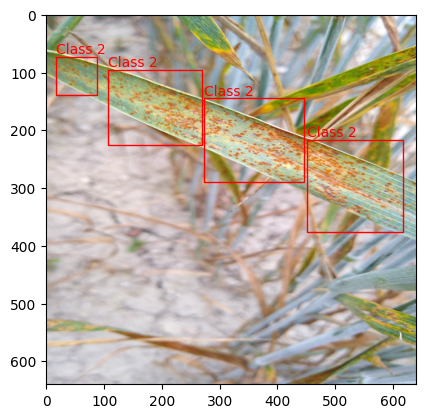

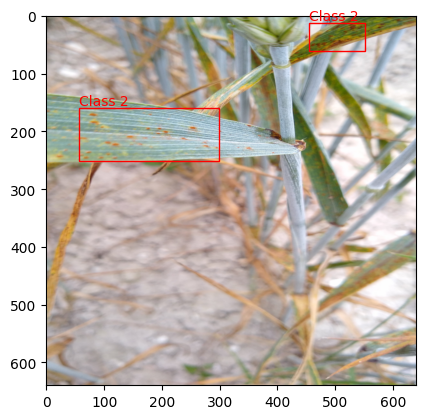

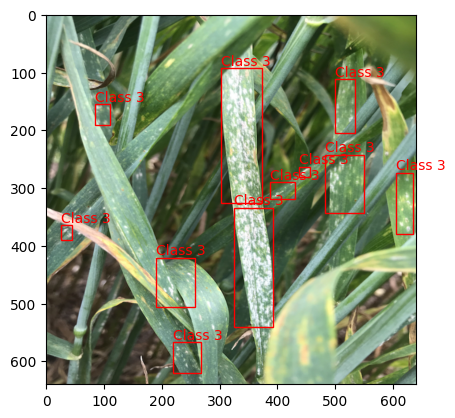

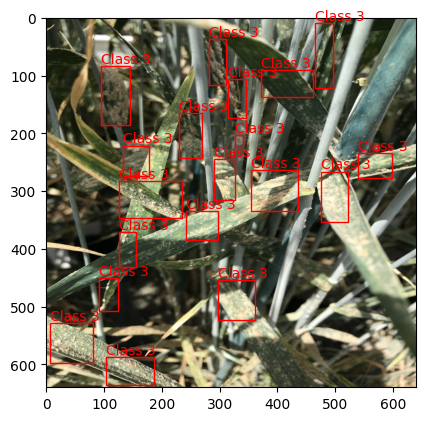

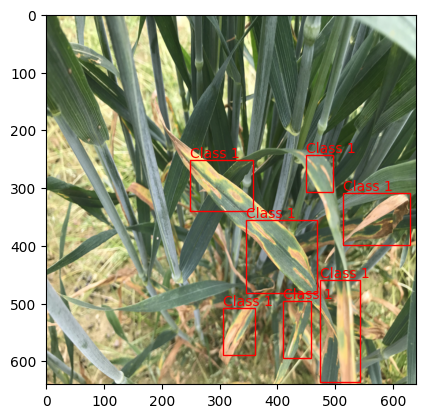

In [ ]:
'''import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

tfrecord_path = '/content/drive/MyDrive/dissertation_project/wheat_dataset/train_640.tfrecord'
num_samples_to_display = 5  # Adjust the number of samples to display

# Create a TFRecordDataset
dataset = tf.data.TFRecordDataset([tfrecord_path])

# Define the feature description for parsing the TFRecord
feature_description = {
    'image/encoded': tf.io.FixedLenFeature([], tf.string),
    'image/object/class/label': tf.io.VarLenFeature(tf.int64),
    'image/object/bbox/xmin': tf.io.VarLenFeature(tf.float32),
    'image/object/bbox/xmax': tf.io.VarLenFeature(tf.float32),
    'image/object/bbox/ymin': tf.io.VarLenFeature(tf.float32),
    'image/object/bbox/ymax': tf.io.VarLenFeature(tf.float32),
}

# Parsing function
def _parse_function(proto):
    return tf.io.parse_single_example(proto, feature_description)

# Parse the dataset
parsed_dataset = dataset.map(_parse_function)

# Get the total number of samples in the dataset
total_samples = sum(1 for _ in parsed_dataset)

# Randomly select indices of samples to display
indices_to_display = np.random.choice(total_samples, size=min(num_samples_to_display, total_samples), replace=False)

# Display information about randomly selected samples
for idx, (i, record) in enumerate(enumerate(parsed_dataset)):
    if i in indices_to_display:
        # Decode the image from bytes
        image = tf.image.decode_image(record['image/encoded'], channels=3)

        # Get class labels, bounding box coordinates, and number of objects
        class_labels = tf.sparse.to_dense(record['image/object/class/label'], default_value=-1).numpy()
        xmin = tf.sparse.to_dense(record['image/object/bbox/xmin'], default_value=-1).numpy()
        xmax = tf.sparse.to_dense(record['image/object/bbox/xmax'], default_value=-1).numpy()
        ymin = tf.sparse.to_dense(record['image/object/bbox/ymin'], default_value=-1).numpy()
        ymax = tf.sparse.to_dense(record['image/object/bbox/ymax'], default_value=-1).numpy()

        # Display the image with bounding boxes
        plt.imshow(image.numpy())

        for j in range(len(class_labels)):
            class_label = class_labels[j]
            box = [xmin[j], ymin[j], xmax[j], ymax[j]]
            rect = Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1],
                             linewidth=1, edgecolor='r', facecolor='none')
            plt.gca().add_patch(rect)
            plt.text(box[0], box[1] - 5, f'Class {class_label}', color='r')

        plt.show()


Class Labels: [2 2 2 2]
Bounding Box Coordinates (xmin, ymin, xmax, ymax): [(335.0, 212.0, 447.0, 369.0), (547.0, 333.0, 636.0, 448.0), (521.0, 3.0, 631.0, 43.0), (283.0, 373.0, 400.0, 560.0)]
Number of Objects: 4


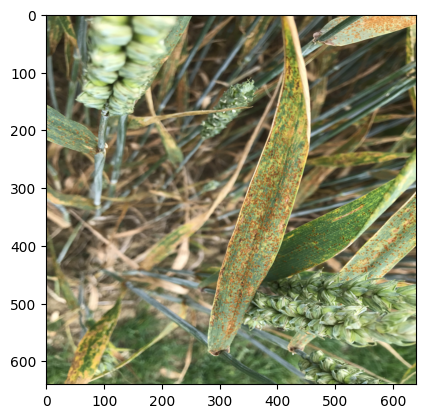

Class Labels: [2 2 2]
Bounding Box Coordinates (xmin, ymin, xmax, ymax): [(135.0, 129.0, 232.0, 331.0), (32.0, 537.0, 218.0, 634.0), (272.0, 237.0, 387.0, 506.0)]
Number of Objects: 3


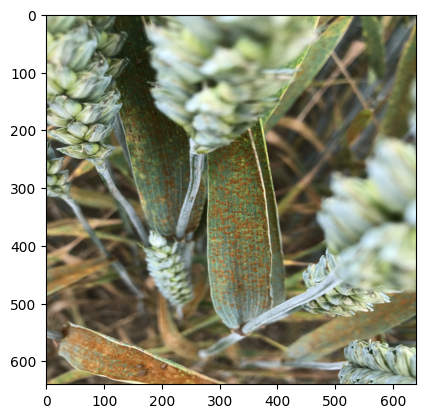

Class Labels: [2 2 2 2 2 2]
Bounding Box Coordinates (xmin, ymin, xmax, ymax): [(225.0, 559.0, 579.0, 622.0), (413.0, 90.0, 517.0, 176.0), (580.0, 53.0, 630.0, 90.0), (331.0, 191.0, 461.0, 282.0), (467.0, 2.0, 547.0, 66.0), (253.0, 287.0, 386.0, 452.0)]
Number of Objects: 6


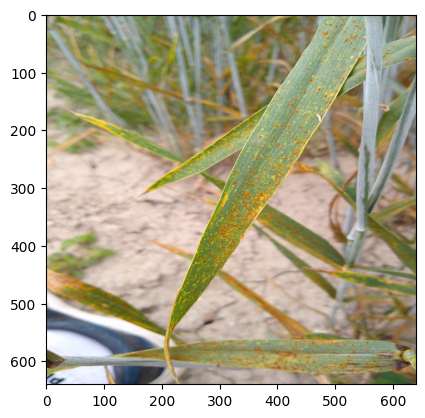

Class Labels: [2 2 2 2]
Bounding Box Coordinates (xmin, ymin, xmax, ymax): [(190.0, 392.0, 324.0, 523.0), (261.0, 164.0, 403.0, 388.0), (455.0, 94.0, 494.0, 130.0), (423.0, 154.0, 449.0, 191.0)]
Number of Objects: 4


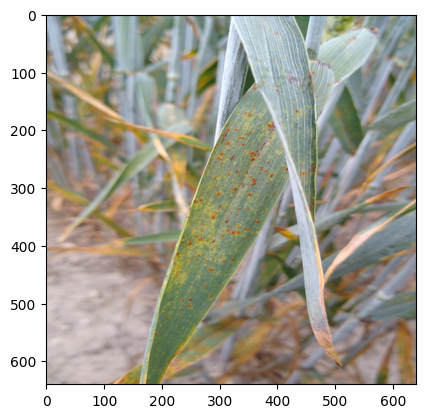

Class Labels: [2 2 2 2 2]
Bounding Box Coordinates (xmin, ymin, xmax, ymax): [(176.0, 176.0, 309.0, 268.0), (314.0, 247.0, 429.0, 369.0), (438.0, 324.0, 556.0, 452.0), (461.0, 50.0, 549.0, 167.0), (551.0, 109.0, 603.0, 199.0)]
Number of Objects: 5


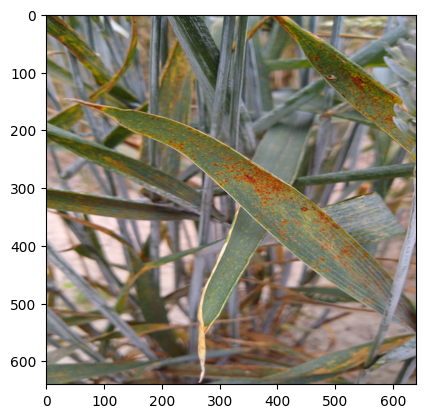

In [ ]:
'''import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

tfrecord_path = "/content/drive/MyDrive/dissertation_project/wheat_dataset/train_640.tfrecord"

# Create a TFRecordDataset
dataset = tf.data.TFRecordDataset([tfrecord_path])

# Define the feature description for parsing the TFRecord
feature_description = {
    'image/encoded': tf.io.FixedLenFeature([], tf.string),
    'image/object/class/label': tf.io.VarLenFeature(tf.int64),
    'image/object/bbox/xmin': tf.io.VarLenFeature(tf.float32),
    'image/object/bbox/xmax': tf.io.VarLenFeature(tf.float32),
    'image/object/bbox/ymin': tf.io.VarLenFeature(tf.float32),
    'image/object/bbox/ymax': tf.io.VarLenFeature(tf.float32),
}

# Parsing function
def _parse_function(proto):
    return tf.io.parse_single_example(proto, feature_description)

# Parse the dataset
parsed_dataset = dataset.map(_parse_function)

# Display information about each sample
for record in parsed_dataset.take(5):
    # Decode the image from bytes
    image = tf.image.decode_jpeg(record['image/encoded'], channels=3)

    # Get class labels, bounding box coordinates, and number of objects
    class_labels = tf.sparse.to_dense(record['image/object/class/label'], default_value=-1).numpy()
    xmin = tf.sparse.to_dense(record['image/object/bbox/xmin'], default_value=-1).numpy()
    xmax = tf.sparse.to_dense(record['image/object/bbox/xmax'], default_value=-1).numpy()
    ymin = tf.sparse.to_dense(record['image/object/bbox/ymin'], default_value=-1).numpy()
    ymax = tf.sparse.to_dense(record['image/object/bbox/ymax'], default_value=-1).numpy()

    # Display information
    print("Class Labels:", class_labels)
    print("Bounding Box Coordinates (xmin, ymin, xmax, ymax):", list(zip(xmin, ymin, xmax, ymax)))
    print("Number of Objects:", len(class_labels))

    # Display the image
    plt.imshow(image.numpy())
    plt.show()


In [ ]:
'''import tensorflow as tf
import random

# Define the path to your TFRecord file
tfrecord_path = "/content/drive/MyDrive/dissertation_project/wheat_dataset/train_640.tfrecord"

# Define a function to parse the TFRecord dataset
def parse_tfrecord_fn(example):
    feature_description = {
        'image/height': tf.io.FixedLenFeature([], tf.int64),
        'image/width': tf.io.FixedLenFeature([], tf.int64),
        'image/filename': tf.io.FixedLenFeature([], tf.string),
        'image/source_id': tf.io.FixedLenFeature([], tf.string),
        'image/encoded': tf.io.FixedLenFeature([], tf.string),
        'image/format': tf.io.FixedLenFeature([], tf.string),
        'image/object/bbox/xmin': tf.io.VarLenFeature(tf.float32),
        'image/object/bbox/xmax': tf.io.VarLenFeature(tf.float32),
        'image/object/bbox/ymin': tf.io.VarLenFeature(tf.float32),
        'image/object/bbox/ymax': tf.io.VarLenFeature(tf.float32),
        'image/object/class/text': tf.io.VarLenFeature(tf.string),
        'image/object/class/label': tf.io.VarLenFeature(tf.int64),
    }
    return tf.io.parse_single_example(example, feature_description)

# Create a TFRecord dataset
raw_dataset = tf.data.TFRecordDataset(tfrecord_path)

# Parse the dataset
parsed_dataset = raw_dataset.map(parse_tfrecord_fn)

# Shuffle the dataset and take a random sample
shuffled_dataset = parsed_dataset.shuffle(buffer_size=10000)  # Adjust buffer_size as needed

# Number of random samples to view
num_samples_to_view = 5

# Loop through and print the information of random images from the TFRecord file
for features in shuffled_dataset.take(num_samples_to_view):
    image_height = features['image/height'].numpy()
    image_width = features['image/width'].numpy()
    filename = features['image/filename'].numpy()
    source_id = features['image/source_id'].numpy()
    image_format = features['image/format'].numpy()

    # Extract bounding box and class information
    xmins = features['image/object/bbox/xmin'].values.numpy()
    xmaxs = features['image/object/bbox/xmax'].values.numpy()
    ymins = features['image/object/bbox/ymin'].values.numpy()
    ymaxs = features['image/object/bbox/ymax'].values.numpy()
    classes_text = features['image/object/class/text'].values.numpy()
    classes = features['image/object/class/label'].values.numpy()

    print(f"Image Height: {image_height}")
    print(f"Image Width: {image_width}")
    print(f"Filename: {filename.decode('utf-8')}")
    print(f"Source ID: {source_id.decode('utf-8')}")
    print(f"Image Format: {image_format.decode('utf-8')}")

    for i in range(len(xmins)):
        print(f"Bounding Box {i + 1}:")
        print(f"  xmin: {xmins[i]}")
        print(f"  xmax: {xmaxs[i]}")
        print(f"  ymin: {ymins[i]}")
        print(f"  ymax: {ymaxs[i]}")
        print(f"  Class Text: {classes_text[i].decode('utf-8')}")
        print(f"  Class Label: {classes[i]}")


Image Height: 640
Image Width: 640
Filename: Brust2492.png
Source ID: Brust2492.png
Image Format: png
Bounding Box 1:
  xmin: 176.0
  xmax: 311.0
  ymin: 6.0
  ymax: 114.0
  Class Text: wheat_brown_rust
  Class Label: 2
Bounding Box 2:
  xmin: 518.0
  xmax: 575.0
  ymin: 301.0
  ymax: 333.0
  Class Text: wheat_brown_rust
  Class Label: 2
Bounding Box 3:
  xmin: 252.0
  xmax: 387.0
  ymin: 117.0
  ymax: 205.0
  Class Text: wheat_brown_rust
  Class Label: 2
Bounding Box 4:
  xmin: 309.0
  xmax: 446.0
  ymin: 208.0
  ymax: 332.0
  Class Text: wheat_brown_rust
  Class Label: 2
Image Height: 640
Image Width: 640
Filename: Septoria1285.png
Source ID: Septoria1285.png
Image Format: png
Bounding Box 1:
  xmin: 6.0
  xmax: 130.0
  ymin: 558.0
  ymax: 632.0
  Class Text: wheat_septoria
  Class Label: 1
Bounding Box 2:
  xmin: 323.0
  xmax: 620.0
  ymin: 257.0
  ymax: 330.0
  Class Text: wheat_septoria
  Class Label: 1
Bounding Box 3:
  xmin: 168.0
  xmax: 249.0
  ymin: 5.0
  ymax: 152.0
  Class 

In [ ]:
'''import tensorflow as tf

# Define the path to your TFRecord file
tfrecord_path = "/content/drive/MyDrive/dissertation_project/wheat_dataset/train_640.tfrecord"

# Initialize a count variable
count = 0

# Create a TFRecord dataset
raw_dataset = tf.data.TFRecordDataset(tfrecord_path)

# Loop through the dataset to count the entries
for _ in raw_dataset:
    count += 1

print(f"Total number of entries in the TFRecord file: {count}")


Total number of entries in the TFRecord file: 881


In [ ]:
'''#Download the model
import os
import tarfile
import urllib.request
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.builders import model_builder

# Define the model name
MODEL_NAME = 'efficientdet_d1_coco17_tpu-32'
MODEL_DIR = '/content/drive/MyDrive/dissertation_project/models'  # Update to your desired directory
MODEL_TAR_FILE = f'{MODEL_NAME}.tar.gz'

# Create the model directory if it doesn't exist
if not os.path.exists(MODEL_DIR):
    os.makedirs(MODEL_DIR)
    print(f"Created model directory: {MODEL_DIR}")

# Define the URL to download the model from the TensorFlow Model Zoo
MODEL_ZOO_URL = f'http://download.tensorflow.org/models/object_detection/tf2/20200711/{MODEL_NAME}.tar.gz'

# Download the model from the URL
urllib.request.urlretrieve(MODEL_ZOO_URL, MODEL_TAR_FILE)
print(f"Downloaded model to: {MODEL_TAR_FILE}")

# Extract the downloaded tar file to the model directory
with tarfile.open(MODEL_TAR_FILE, 'r:gz') as tar:
    tar.extractall(path=MODEL_DIR)
    print(f"Extracted model to: {MODEL_DIR}")

# Set up the model configuration and create the model
CONFIG_PATH = os.path.join(MODEL_DIR, MODEL_NAME, 'pipeline.config')
configs = config_util.get_configs_from_pipeline_file(CONFIG_PATH)
model_config = configs['model']

# Build the model based on the configuration
model = model_builder.build(model_config=model_config, is_training=True)

# Check if a checkpoint exists in the model directory
ckpt_path = os.path.join(MODEL_DIR, MODEL_NAME, 'checkpoint')
if os.path.exists(ckpt_path):
    # Restore the checkpoint to the model
    ckpt = tf.compat.v2.train.Checkpoint(model=model)
    ckpt.restore(os.path.join(MODEL_DIR, MODEL_NAME, 'checkpoint', 'ckpt-0')).expect_partial()
    print(f"Loaded pretrained model: {MODEL_NAME}")
else:
    print("No checkpoint found.")

Downloaded model to: efficientdet_d1_coco17_tpu-32.tar.gz
Extracted model to: /content/drive/MyDrive/dissertation_project/models
Loaded pretrained model: efficientdet_d1_coco17_tpu-32


In [ ]:
'''import sys
import os
import numpy as np
import xml.etree.ElementTree as ET

from sklearn.cluster import KMeans

def xml_to_boxes(path, rescale_width=None, rescale_height=None):
    """Extracts bounding-box widths and heights from ground-truth dataset.

    Args:
    path : Path to .xml annotation files for your dataset.
    rescale_width : Scaling factor to rescale width of bounding box.
    rescale_height : Scaling factor to rescale height of bounding box.

    Returns:
    bboxes : A numpy array with pairs of box dimensions as [width, height].
    """

    xml_list = []
    filenames = os.listdir(os.path.join(path))
    filenames = [os.path.join(path, f) for f in filenames if (f.endswith('.xml'))]

    for xml_file in filenames:
        try:
            tree = ET.parse(xml_file)
            root = tree.getroot()

            for member in root.findall('object'):
                bndbox = member.find('bndbox')
                bbox_width = float(bndbox.find('xmax').text) - float(bndbox.find('xmin').text)
                bbox_height = float(bndbox.find('ymax').text) - float(bndbox.find('ymin').text)

                if rescale_width and rescale_height:
                    size = root.find('size')
                    bbox_width = bbox_width * (rescale_width / float(size.find('width').text))
                    bbox_height = bbox_height * (rescale_height / float(size.find('height').text))

                xml_list.append([bbox_width, bbox_height])

        except Exception as e:
            print(f"Error processing file {xml_file}: {e}")

    bboxes = np.array(xml_list)
    return bboxes


def average_iou(bboxes, anchors):
    """Calculates the Intersection over Union (IoU) between bounding boxes and anchors.

    Args:
        bboxes: Array of bounding boxes in [width, height] format.
        anchors: Array of aspect ratios [n, 2] format.

    Returns:
        avg_iou_perc: A Float value, average of IOU scores from each aspect ratio.
    """
    intersection_width = np.minimum(anchors[:, [0]], bboxes[:, 0]).T
    intersection_height = np.minimum(anchors[:, [1]], bboxes[:, 1]).T

    if np.any(intersection_width == 0) or np.any(intersection_height == 0):
        raise ValueError("Some boxes have zero size.")

    intersection_area = intersection_width * intersection_height
    boxes_area = np.prod(bboxes, axis=1, keepdims=True)
    anchors_area = np.prod(anchors, axis=1, keepdims=True).T
    union_area = boxes_area + anchors_area - intersection_area
    avg_iou_perc = np.mean(np.max(intersection_area / union_area, axis=1)) * 100

    return avg_iou_perc

def kmeans_aspect_ratios(bboxes, kmeans_max_iter, num_aspect_ratios):
    """Calculate the centroid of bounding boxes clusters using Kmeans algorithm.

    Args:
        bboxes: Array of bounding boxes in [width, height] format.
        kmeans_max_iter: Maximum number of iterations to find centroids.
        num_aspect_ratios: Number of centroids to optimize kmeans.

    Returns:
        aspect_ratios: Centroids of cluster (optimized for dataset).
        avg_iou_prec: Average score of bboxes intersecting with new aspect ratios.
    """

    assert len(bboxes), "You must provide bounding boxes"

    normalized_bboxes = bboxes / np.sqrt(bboxes.prod(axis=1, keepdims=True))

    # Using kmeans to find centroids of the width/height clusters
    try:
        kmeans = KMeans(
            init='random', n_clusters=num_aspect_ratios, random_state=0, max_iter=kmeans_max_iter)
        kmeans.fit(X=normalized_bboxes)
        ar = kmeans.cluster_centers_
    except Exception as e:
        print(f"Error in KMeans clustering: {e}")
        sys.exit("Failed to find aspect ratios due to KMeans clustering error.")

    assert len(ar), "Unable to find k-means centroid, try increasing kmeans_max_iter."

    avg_iou_perc = average_iou(normalized_bboxes, ar)

    if not np.isfinite(avg_iou_perc):
        sys.exit("Failed to get aspect ratios due to numerical errors in k-means")

    aspect_ratios = [w/h for w,h in ar]

    return aspect_ratios, avg_iou_perc

# Tune this based on your accuracy/speed goals as described above
num_aspect_ratios = 6  # can be [2,3,4,5,6]

# Tune the iterations based on the size and distribution of your dataset
# You can check avg_iou_prec every 100 iterations to see how centroids converge
kmeans_max_iter = 1000

# These should match the training pipeline config ('fixed_shape_resizer' param)
width = 640
height = 640

# Get the ground-truth bounding boxes for our dataset
XML_PATH = "/content/drive/MyDrive/dissertation_project/wheat_dataset/wheat_dataset_640x640/annotations/train"
bboxes = xml_to_boxes(path=XML_PATH, rescale_width=width, rescale_height=height)

aspect_ratios, avg_iou_perc = kmeans_aspect_ratios(
    bboxes=bboxes,
    kmeans_max_iter=kmeans_max_iter,
    num_aspect_ratios=num_aspect_ratios
)

aspect_ratios = sorted(aspect_ratios)

print('Aspect ratios generated:', [round(ar, 2) for ar in aspect_ratios])
print('Average IOU with anchors:', avg_iou_perc)


Aspect ratios generated: [0.2, 0.39, 0.67, 1.1, 1.89, 3.85]
Average IOU with anchors: 87.55781414549025


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
